# ELITE exome data

In [2]:
# install.packages("tidyverse")
# install.packages("labeling",repos = "cran")
# install.packages("ggplot2",dependencies = T)
# install.packages("ggpointdensity",lib="~/R/packages3.5/",dependencies=T)
library(labeling,lib.loc = "~/R/packages3.5")
library(ggplot2,lib.loc = "~/R/packages3.5")
library(data.table)
library(labeling)
library(ggplot2)
library(ggpointdensity,lib.loc = "~/R/packages3.5")
suppressPackageStartupMessages(library(qqman))
library(corrplot)

corrplot 0.84 loaded


## PCA with UKBB: select EUs, examine PCs

In [2]:
# set the wd
setwd("/oak/stanford/groups/euan/projects/elite/ukbb_exome/beds/")
d = fread("ukbb_elite_merged.filtered.eigenvec",stringsAsFactors=F,data.table=F)
head(d)
d$is_elite = grepl("_",d$IID)
dim(d)
table(as.numeric(d$is_elite))

# table(d$class)
# boxplot(height~class,data=d)
# quantile(d[d$class==1,"height"])

#FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1,-1,-0.000904710,1.58322e-03,-0.000277371,-1.92920e-03,0.005067500,-0.003583770,0.00296473,0.00285268,-0.008053050,0.000526891
0,01_02,-0.000518797,-9.95376e-04,0.003647890,7.97161e-05,-0.001283380,-0.000300721,0.00315210,0.00280653,-0.000482419,-0.005057450
0,01_03,-0.000994941,3.43132e-04,0.000398093,-1.17622e-03,0.001871040,-0.000340352,0.00084905,-0.00345777,0.001509220,0.000502351
0,01_05,-0.000557747,-4.48522e-04,0.001193910,-9.56834e-04,0.001635500,-0.004906180,0.00261615,-0.00269032,-0.006115730,-0.005749390
0,01_06,-0.000725783,6.55897e-05,0.001859550,-8.53900e-04,0.003683130,-0.008297720,0.00470120,-0.00131836,0.001778600,0.000591852
0,01_07,-0.000660097,-1.11398e-03,0.001381730,-3.24960e-03,-0.000940202,-0.003057820,0.00935611,-0.00279663,0.000946573,-0.006993460


[1] 50227    13


    0     1 
49960   267 

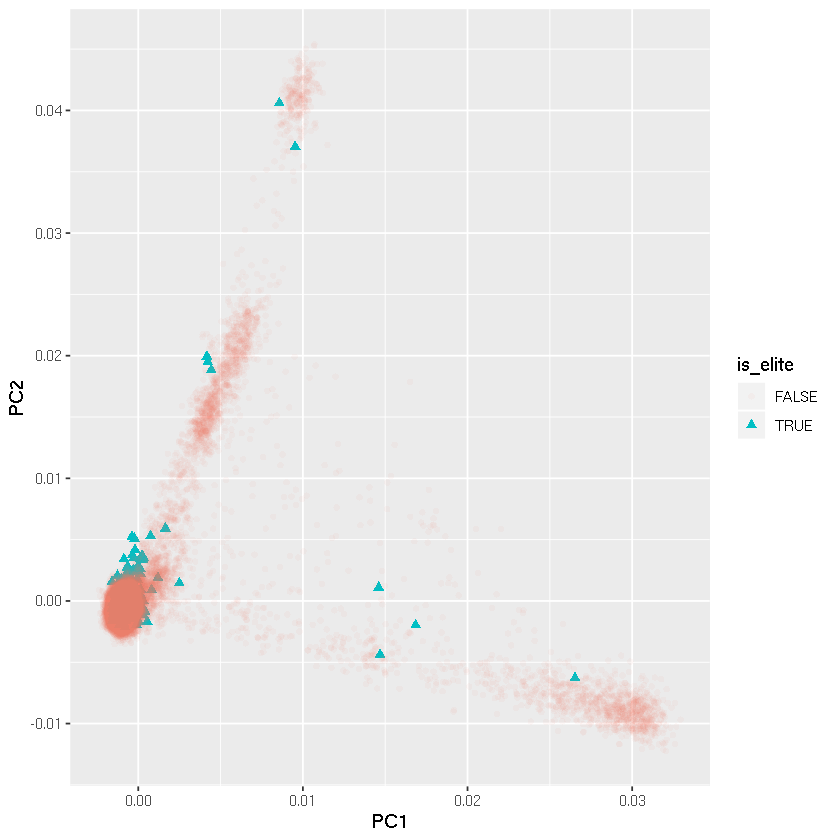

In [5]:
p = ggplot(d) + 
geom_point(aes(x=PC1, y=PC2,col=is_elite, shape=is_elite,alpha=is_elite,size=is_elite))+
scale_size_manual(values=c(1.5,2.0)) +
scale_alpha_manual(values=c(0.05,1))
plot(p)


[1] 50227    14

[1] 50227

[1] 50227

       
        FALSE  TRUE
  FALSE  2874     9
  TRUE  47086   258

#FID,IID
<int>,<chr>
-1,-1
0,01_02
0,01_03
0,01_05
0,01_06
0,01_07


[1] 47344     2

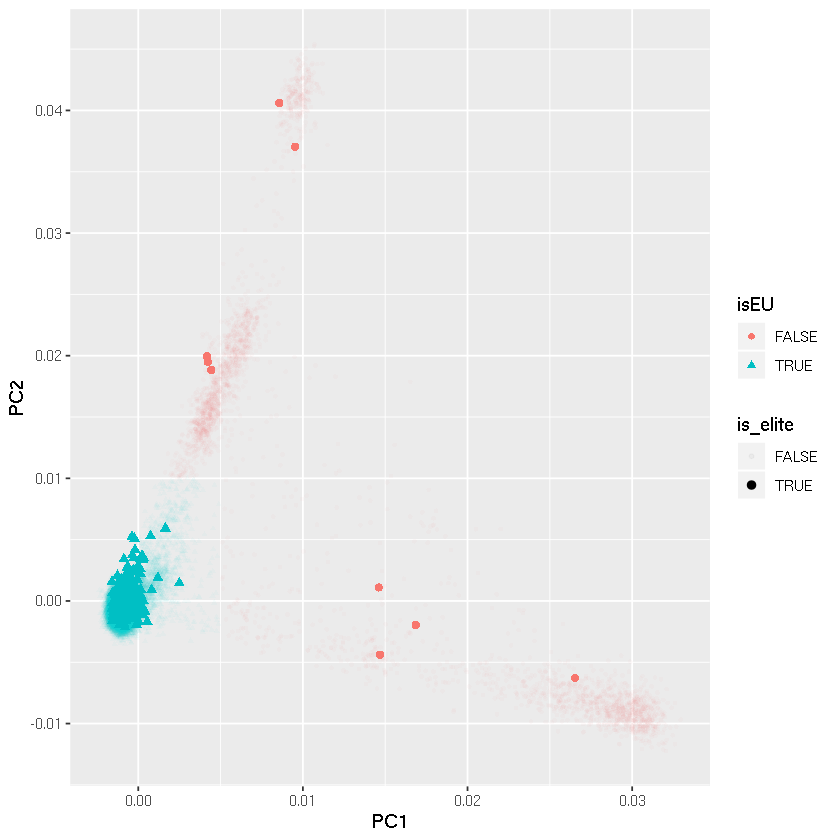

In [9]:
# define the EUs
d$isEU = d$PC1 < 0.005 & d$PC2 < 0.01
dim(d)
length(d$isEU)
length(d$is_elite)
table(d$isEU,d$is_elite)
p = ggplot(d) + 
geom_point(aes(x=PC1, y=PC2,col=isEU, shape=isEU,alpha=is_elite,size=is_elite))+
scale_size_manual(values=c(1.0,2.0)) +
scale_alpha_manual(values=c(0.03,1))
plot(p)

# Subset the fam file
eu_fam = d[d$isEU,1:2]
head(eu_fam)
dim(eu_fam)
#fwrite(eu_fam,file="../ukbb_elite_merged_EU.fam",sep="\t",row.names=F,col.names=T,quote=F)


## PCA: EUs

In [2]:
setwd("/oak/stanford/groups/euan/projects/elite/ukbb_exome/eu_beds/")
d = fread("merged_pheno.phe",stringsAsFactors=F,data.table=F)
head(d)
d$is_elite = grepl("_",d$IID)
dim(d)
table(as.numeric(d$is_elite))


#FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,⋯,PC19,PC20,sex,age,class,VO2,height,weight,BMI,ethnicity
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
-1,-1,-0.006855150,-5.29922e-03,0.000183395,0.002821510,0.000339447,-0.005465680,-0.000347600,-0.003965910,⋯,-0.00979317,-0.00451740,1,67,1,-9,-9,-9,-9.00000,-9
0,01_02,0.000532172,4.87255e-03,0.003480500,-0.002889260,-0.003439380,0.003968310,0.002765460,-0.006120310,⋯,-0.00824482,-0.00343024,2,25,2,83,-9,-9,22.37654,-9
0,01_03,-0.001180980,2.30961e-03,0.000930061,-0.000238234,0.010780200,-0.010129300,-0.007681330,-0.002051580,⋯,0.00274961,-0.00202999,-9,-9,2,-9,-9,-9,-9.00000,-9
0,01_05,-0.001100550,-4.68307e-05,0.003969290,0.007656530,-0.005956220,-0.009681350,0.000250725,0.003063510,⋯,0.00393578,-0.00623850,-9,-9,2,-9,-9,-9,-9.00000,-9
0,01_06,-0.003595230,1.72945e-03,0.005507890,0.009227170,-0.004795320,-0.000545968,0.002809810,-0.005188580,⋯,0.00348430,0.00700391,-9,-9,2,-9,-9,-9,-9.00000,-9
0,01_07,-0.003076340,-2.11487e-03,0.007493860,-0.001621280,0.001459410,0.007107600,0.008990440,-0.000513581,⋯,-0.00240757,-0.00158700,1,25,2,67,-9,-9,19.17355,-9


[1] 37346    31


    0     1 
37088   258 

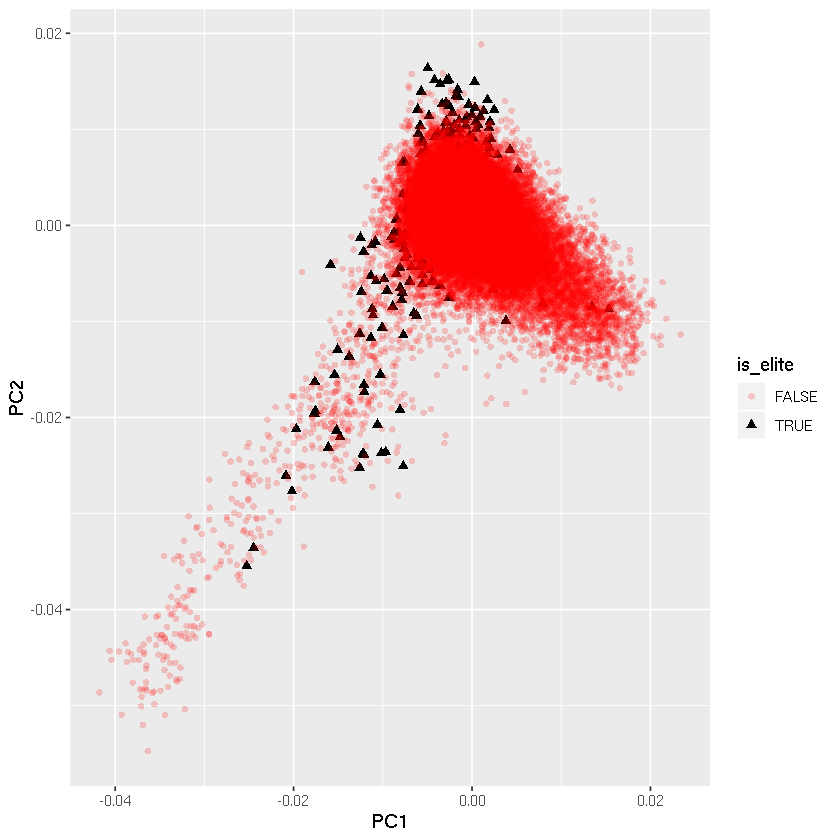

In [3]:
p = ggplot(d) + 
geom_point(aes(x=PC1, y=PC2,col=is_elite, shape=is_elite,alpha=is_elite,size=is_elite))+
scale_size_manual(values=c(1.5,2.0)) +
scale_alpha_manual(values=c(0.2,1)) + 
scale_color_manual(values=c("red","black"))
plot(p)

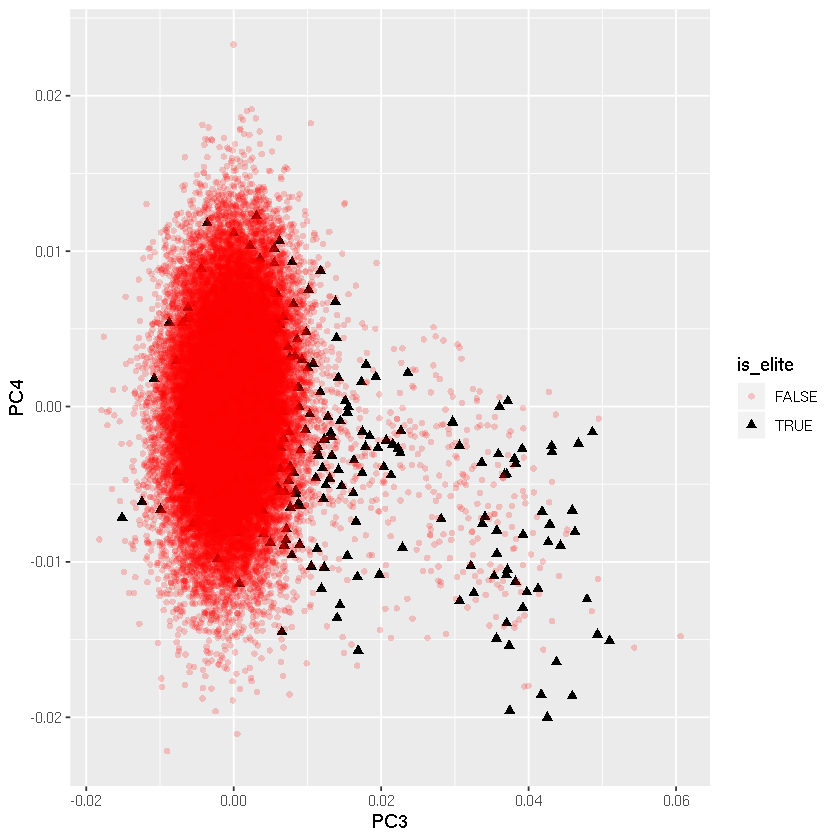

In [4]:
p = ggplot(d) + 
geom_point(aes(x=PC3,y=PC4,col=is_elite, shape=is_elite,alpha=is_elite,size=is_elite))+
scale_size_manual(values=c(1.5,2.0)) +
scale_alpha_manual(values=c(0.2,1)) + 
scale_color_manual(values=c("red","black"))
plot(p)

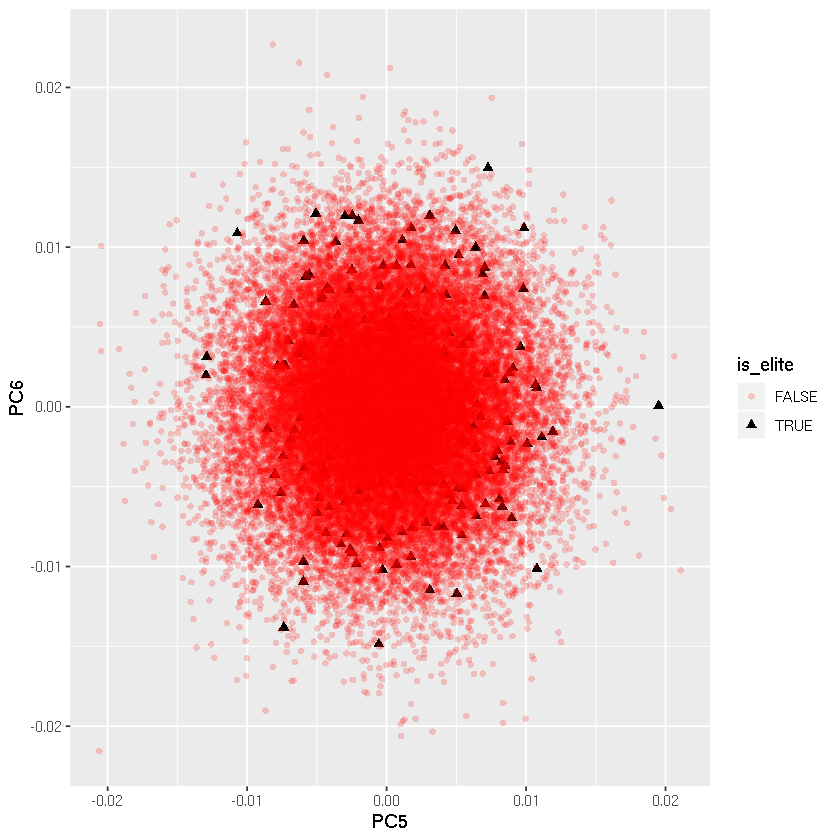

In [16]:
p = ggplot(d) + 
geom_point(aes(x=PC5, y=PC6,col=is_elite, shape=is_elite,alpha=is_elite,size=is_elite))+
scale_size_manual(values=c(1.5,2.0)) +
scale_alpha_manual(values=c(0.2,1)) + 
scale_color_manual(values=c("red","black"))
plot(p)

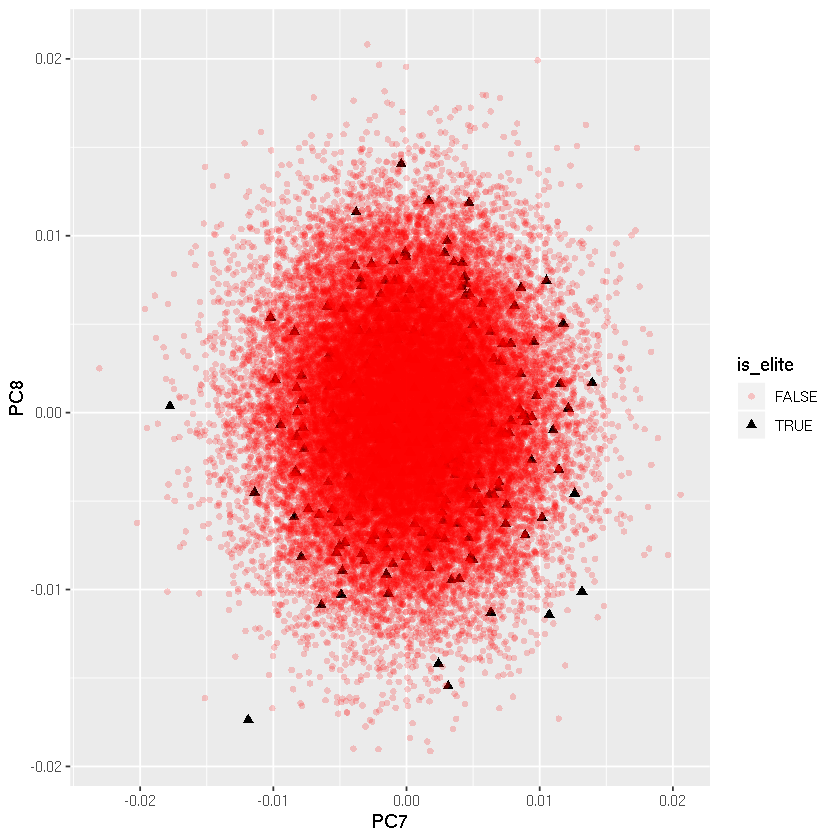

In [17]:
p = ggplot(d) + 
geom_point(aes(x=PC7, y=PC8,col=is_elite, shape=is_elite,alpha=is_elite,size=is_elite))+
scale_size_manual(values=c(1.5,2.0)) +
scale_alpha_manual(values=c(0.2,1)) + 
scale_color_manual(values=c("red","black"))
plot(p)

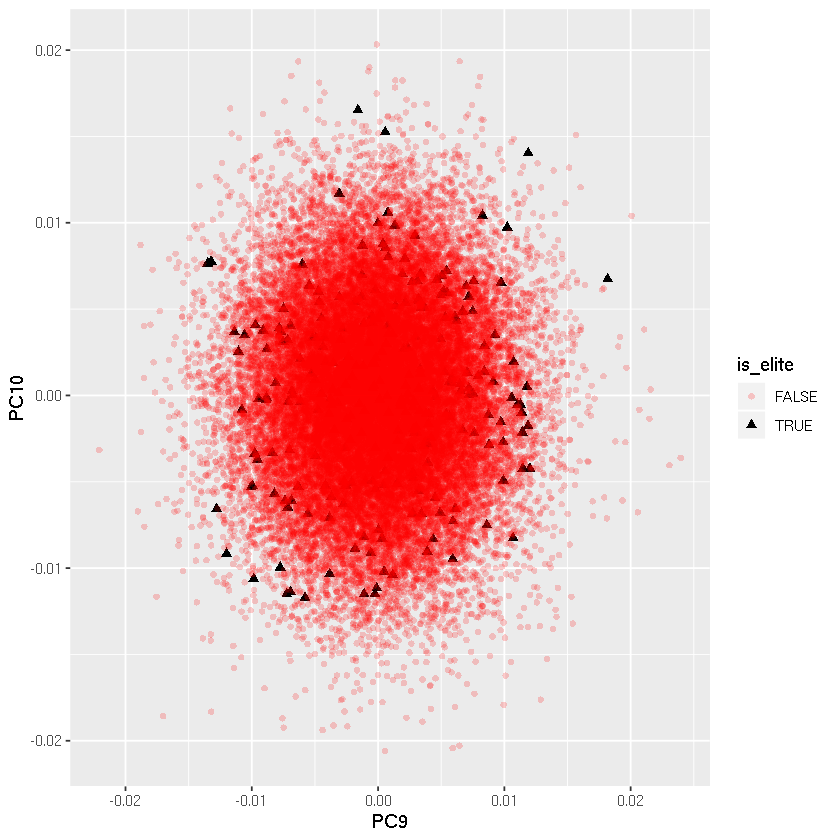

In [19]:
p = ggplot(d) + 
geom_point(aes(x=PC9, y=PC10,col=is_elite, shape=is_elite,alpha=is_elite,size=is_elite))+
scale_size_manual(values=c(1.5,2.0)) +
scale_alpha_manual(values=c(0.2,1)) + 
scale_color_manual(values=c("red","black"))
plot(p)

# Examine the country of birth

In [ ]:
# Add country information
country_info = fread(
    "/oak/stanford/groups/euan/projects/elite/ukbb_exome/ukbb_analyze_pgen/ukb2005693_ukb37855.fields1647_20115.tsv",
    data.table=F,stringsAsFactors=F
)
country_codes = fread(
    "/oak/stanford/groups/euan/projects/elite/ukbb_exome/ukbb_analyze_pgen/ukb2005693_ukb37855.country_of_birth.coding.tsv",
    data.table=F,stringsAsFactors=F
)

code2str = country_codes[,"meaning"]
names(code2str) = country_codes[,"#field_val"]

is1647 = country_info[,"field"] == "1647"
country_v1 = paste(country_info[is1647,"field"],country_info[is1647,"val"],sep="_")
country_v1 = code2str[country_v1]
names(country_v1) = as.character(country_info[is1647,1])
country_v2 = paste(country_info[!is1647,"field"],country_info[!is1647,"val"],sep="_")
country_v2 = code2str[country_v2]
names(country_v2) = as.character(country_info[!is1647,1])

country_v = country_v2
specific1647 = setdiff(names(country_v1),names(country_v2))
country_v[specific1647] = country_v1[specific1647]
save(country_v,file = "/oak/stanford/groups/euan/projects/elite/ukbb_exome/ukbb_analyze_pgen/country_v.RData")


In [6]:
load("/oak/stanford/groups/euan/projects/elite/ukbb_exome/ukbb_analyze_pgen/country_v.RData")
d$country = country_v[as.character(d[,2])]
table(is.na(d$country))
sort(table(d$country),decreasing=T)[1:20]


FALSE  TRUE 
37087   259 


            England            Scotland               Wales Republic of Ireland 
              32927                1019                 745                 474 
   Northern Ireland             Germany                 USA              France 
                245                 189                 127                 104 
       South Africa           Australia               Italy              Poland 
                103                  94                  75                  73 
        New Zealand              Canada               Spain         Netherlands 
                 65                  62                  56                  46 
           Portugal               India      United Kingdom            Zimbabwe 
                 42                  35                  31                  31 

In [12]:
# add the elite information by country
elite_samples = d[d$is_elite,2]
elite_samp_country = sapply(elite_samples,function(x)strsplit(x,split="_")[[1]][1])
names(elite_samp_country) = elite_samples
elite_samp_country[elite_samp_country=="01"] = "USA"
elite_samp_country[elite_samp_country=="02"] = "United Kingdom"
elite_samp_country[elite_samp_country=="03"] = "Sweden"
elite_samp_country[elite_samp_country=="04"] = "USA"
elite_samp_country[elite_samp_country=="05"] = "Spain"
elite_samp_country[elite_samp_country=="07"] = "Lithuania"
elite_samp_country[elite_samp_country=="09"] = "USA"
rownames(d) = d[,2]
d[names(elite_samp_country),"country"] = elite_samp_country
table(elite_samp_country)
table(is.na(d$country))
sort(table(d$country),decreasing=T)[1:40]

elite_samp_country
     Lithuania          Spain         Sweden United Kingdom            USA 
            29             13             64             16            136 


FALSE  TRUE 
37345     1 


            England            Scotland               Wales Republic of Ireland 
              32927                1019                 745                 474 
                USA    Northern Ireland             Germany              France 
                263                 245                 189                 104 
       South Africa           Australia              Sweden               Italy 
                103                  94                  77                  75 
             Poland               Spain         New Zealand              Canada 
                 73                  69                  65                  62 
     United Kingdom         Netherlands            Portugal               India 
                 47                  46                  42                  35 
          Lithuania            Zimbabwe           Singapore              Cyprus 
                 35                  31                  27                  25 
            Denmark        

In [36]:
country_slim = d$country
country_slim[country_slim=="Sweden"] = "Nordic"
country_slim[country_slim=="Norway"] = "Nordic"
country_slim[country_slim=="Denmark"] = "Nordic"
country_slim[country_slim=="Spain"] = "Iberia"
country_slim[country_slim=="Portugal"] = "Iberia"
country_slim[country_slim=="England"] = "UK"
country_slim[country_slim=="Scotland"] = "UK"
country_slim[country_slim=="England"] = "UK"
country_slim[country_slim=="Wales"] = "UK"
country_slim[country_slim=="Republic of Ireland"] = "UK"
country_slim[country_slim=="Northern Ireland"] = "UK"
country_slim[country_slim=="United Kingdom"] = "UK"
country_slim[country_slim=="Lithuania"] = "EastEU"
country_slim[country_slim=="Russia"] = "EastEU"
country_slim[country_slim=="Poland"] = "EastEU"
country_slim[country_slim=="France"] = "CentralEU"
country_slim[country_slim=="Germany"] = "CentralEU"
country_slim[country_slim=="Netherlands"] = "CentralEU"
country_slim[country_slim=="Belgium"] = "CentralEU"
country_slim[country_slim=="Italy"] = "SouthEU"
country_slim[country_slim=="Greece"] = "SouthEU"
country_slim[country_slim=="Cyprus"] = "SouthEU"
country_slim[country_slim=="Zimbabwe"] = "Other"
country_slim[country_slim=="India"] = "Other"
country_slim[country_slim=="Canada"] = "Other"
country_slim[country_slim=="New Zealand"] = "Other"
country_slim[country_slim=="Australia"] = "Other"
country_slim[country_slim=="South Africa"] = "Other"
country_slim[country_slim=="USA"] = "Other"
country_slim[is.na(country_slim)] = "Other"
country_slim[country_slim %in% names(which(table(country_slim)<30))] = "Other"
d$country_slim = country_slim
sort(table(d$country_slim))


   Iberia   SouthEU    Nordic    EastEU CentralEU     Other        UK 
      111       114       116       122       356      1070     35457 


            Belgium            Bulgaria            Ethiopia             Germany 
                  1                   1                   1                   1 
              India             Lebanon           Mauritius             Morocco 
                  1                   1                   1                   1 
        Netherlands    Northern Ireland            Scotland               Spain 
                  1                   1                   1                   1 
              Syria              Turkey           Argentina           Australia 
                  1                   1                   2                   2 
             Canada              France             Hungary Republic of Ireland 
                  2                   2                   2                   2 
            Romania              Russia               Wales              Brazil 
                  2                   2                   2                   3 
               Iraq        

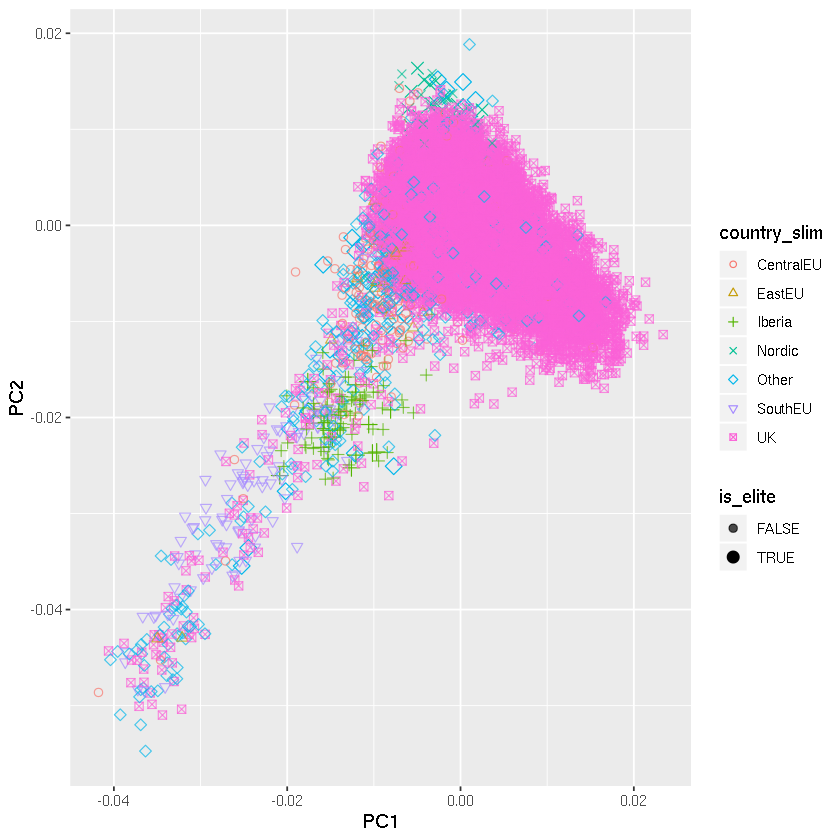

In [45]:
# PCs vs. countries
p = ggplot(d) + 
geom_point(aes(x=PC1, y=PC2,col=country_slim,shape=country_slim,alpha=is_elite,size=is_elite))+
scale_size_manual(values=c(2,3.0)) +
scale_alpha_manual(values=c(0.7,1)) + 
scale_shape_manual(values = c(1:length(unique(d$country_slim))))
plot(p)
sort(table(d[d$PC1< -0.02,"country"]))

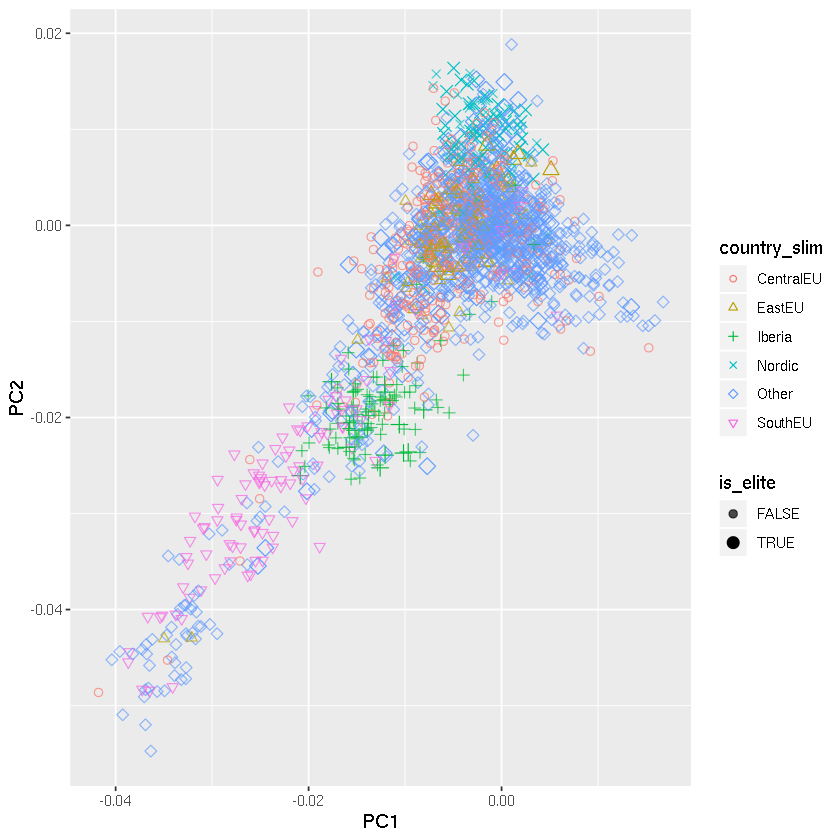

In [46]:
p = ggplot(d[d$country_slim!="UK",]) + 
geom_point(aes(x=PC1, y=PC2,col=country_slim,shape=country_slim,alpha=is_elite,size=is_elite))+
scale_size_manual(values=c(2,3.0)) +
scale_alpha_manual(values=c(0.7,1)) + 
scale_shape_manual(values = c(1:length(unique(d$country_slim))))
plot(p)

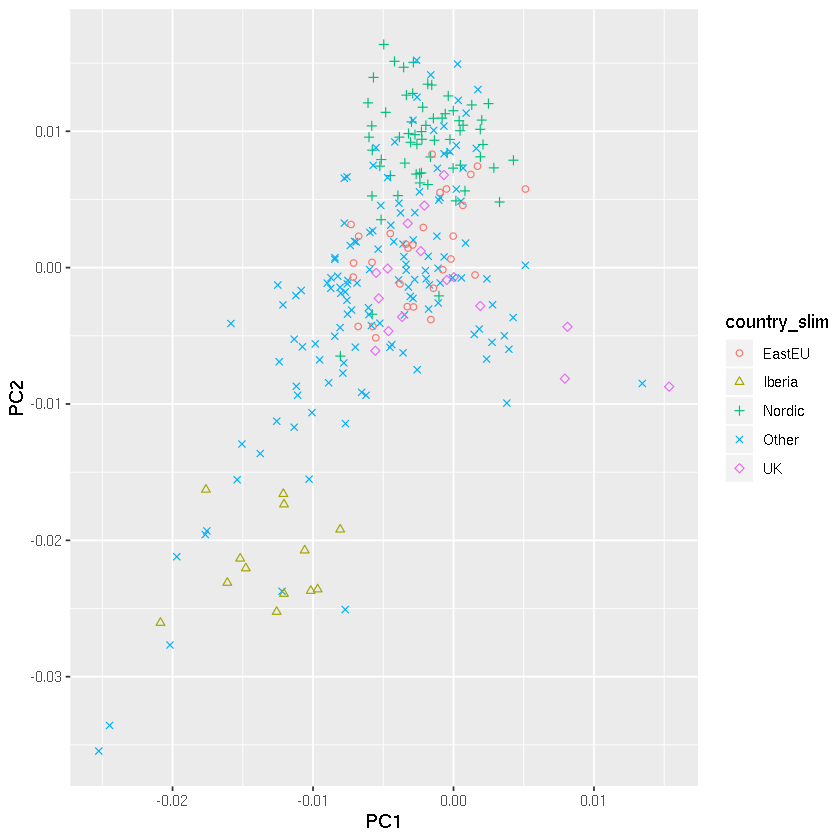

In [48]:
p = ggplot(d[d$is_elite,]) + 
geom_point(aes(x=PC1, y=PC2,col=country_slim,shape=country_slim))+
scale_size_manual(values=c(2,3.0)) +
scale_alpha_manual(values=c(0.7,1)) + 
scale_shape_manual(values = c(1:length(unique(d$country_slim))))
plot(p)

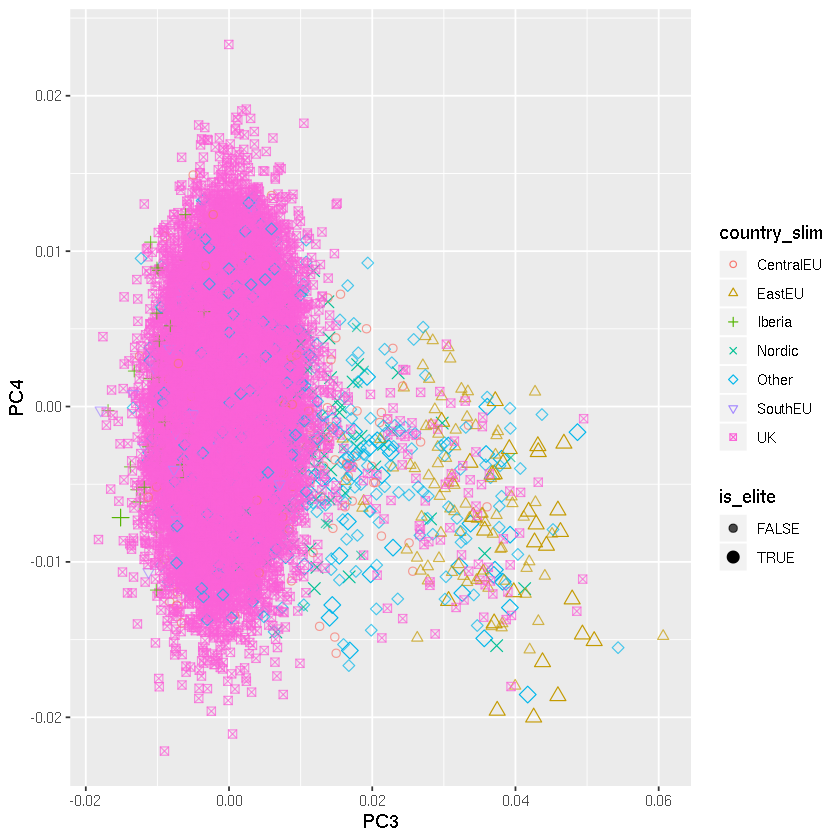

In [49]:
p = ggplot(d) + 
geom_point(aes(x=PC3, y=PC4,col=country_slim,shape=country_slim,alpha=is_elite,size=is_elite))+
scale_size_manual(values=c(2,3.0)) +
scale_alpha_manual(values=c(0.7,1)) + 
scale_shape_manual(values = c(1:length(unique(d$country_slim))))
plot(p)

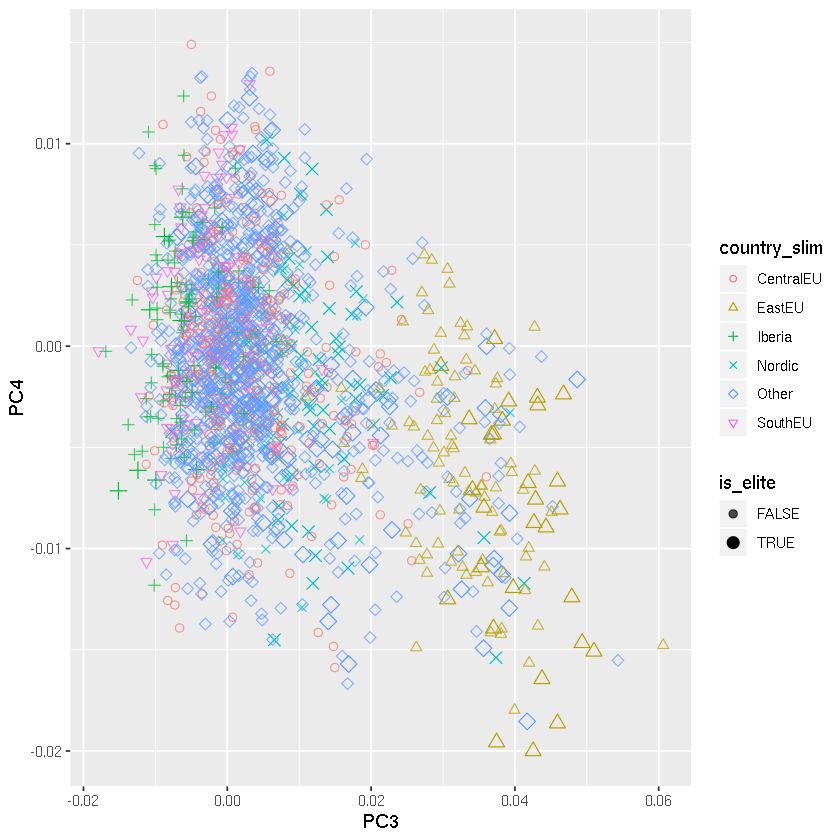

In [50]:
p = ggplot(d[d$country_slim!="UK",]) + 
geom_point(aes(x=PC3, y=PC4,col=country_slim,shape=country_slim,alpha=is_elite,size=is_elite))+
scale_size_manual(values=c(2,3.0)) +
scale_alpha_manual(values=c(0.7,1)) + 
scale_shape_manual(values = c(1:length(unique(d$country_slim))))
plot(p)

## Define the intra EU group

       
        FALSE  TRUE
  FALSE   958   131
  TRUE  36130   127

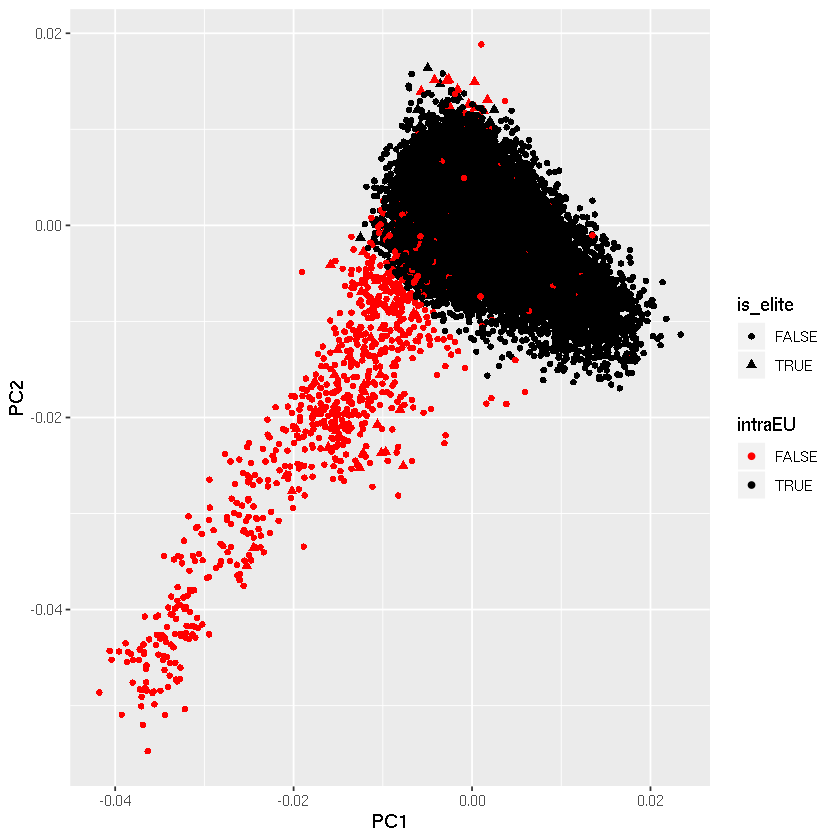

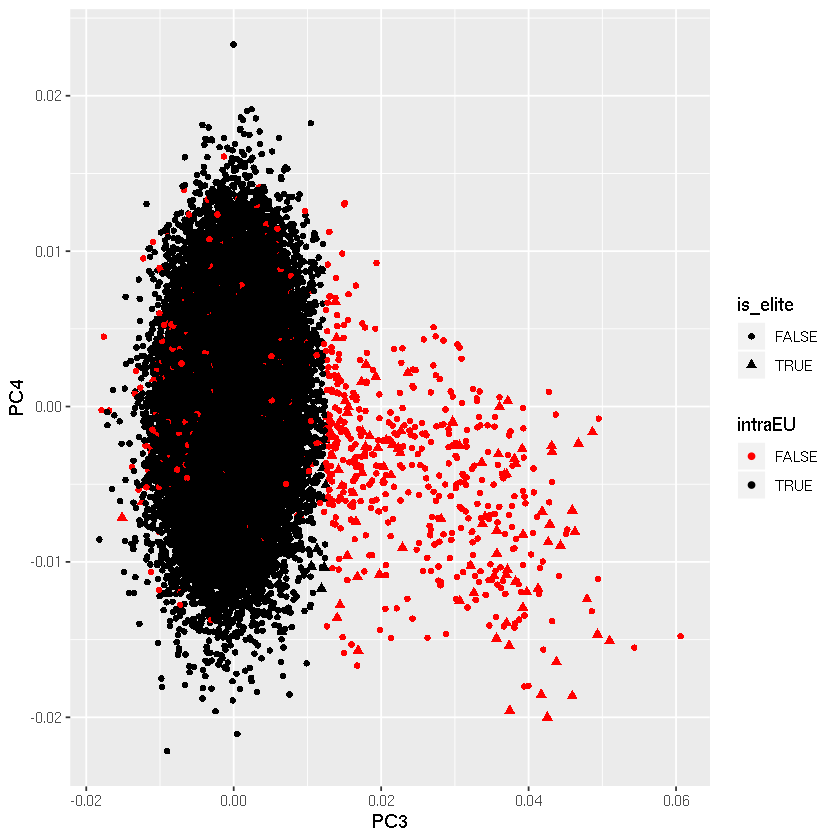

In [95]:
pcs1_4_disc = apply(d[,paste0("PC",1:4)],2,cut,breaks=100)
tb1 = paste(pcs1_4_disc[,1],pcs1_4_disc[,2])
outliers_tb1 = names(which(table(tb1) < 5))
tb2 = paste(pcs1_4_disc[,3],pcs1_4_disc[,4])
outliers_tb2 = names(which(table(tb2) < 25))
d$intraEU = ! ( (tb1 %in% outliers_tb1 & d$PC1 < 0.01 & d$PC2 < 0) | 
                (d$PC3>0.0125))

d$intraEU = (d$PC1 + d$PC2 > -0.014 & d$PC2 > -0.017) & (d$PC3 < 0.0125)
table(d$intraEU,d$is_elite)

intraeu_fam = d[d$intraEU,1:2]
fwrite(intraeu_fam,
    file="/oak/stanford/groups/euan/projects/elite/ukbb_exome/ukbb_elite_merged_rivaslabEU_intra.fam",
    sep="\t",row.names=F,col.names=T,quote=F)
intraeu_fam2 = d[!d$intraEU,1:2]
fwrite(intraeu_fam2,
    file="/oak/stanford/groups/euan/projects/elite/ukbb_exome/ukbb_elite_merged_rivaslabEU_intra_others.fam",
    sep="\t",row.names=F,col.names=T,quote=F)

## Load prev computed 
#intraeu_fam = fread(
#    "/oak/stanford/groups/euan/projects/elite/ukbb_exome/ukbb_elite_merged_rivaslabEU_intra.fam",
#    stringsAsFactors = F, data.table=F
#)
#d$intraEU = d[,2] %in% intraeu_fam[,2]

p = ggplot(d) + 
geom_point(aes(x=PC1, y=PC2,col=intraEU, shape=is_elite,size=is_elite))+
scale_size_manual(values=c(1.5,2.0)) +
scale_alpha_manual(values=c(0.2,1)) + 
scale_color_manual(values=c("red","black"))
plot(p)
p = ggplot(d) + 
geom_point(aes(x=PC3, y=PC4,col=intraEU, shape=is_elite,size=is_elite))+
scale_size_manual(values=c(1.5,2.0)) +
scale_alpha_manual(values=c(0.2,1)) + 
scale_color_manual(values=c("red","black"))
plot(p)





## Sanity check: PCA on EU ukbb variants alone

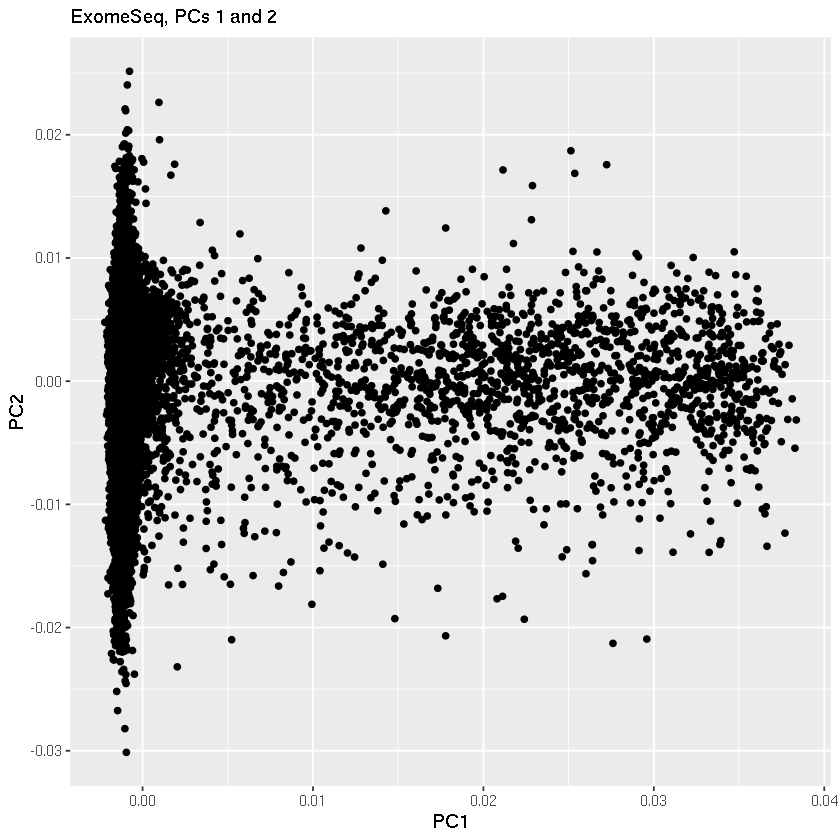

In [96]:
d2 = fread(
    "/oak/stanford/groups/euan/projects/elite/ukbb_exome/ukbb_analyze_pgen/eu_rivaslab/eu_pca.eigenvec",
    data.table=F,stringsAsFactors=F
)
p = ggplot(d2) + geom_point(aes(x=PC1,y=PC2))+ ggtitle("ExomeSeq, PCs 1 and 2")
plot(p)

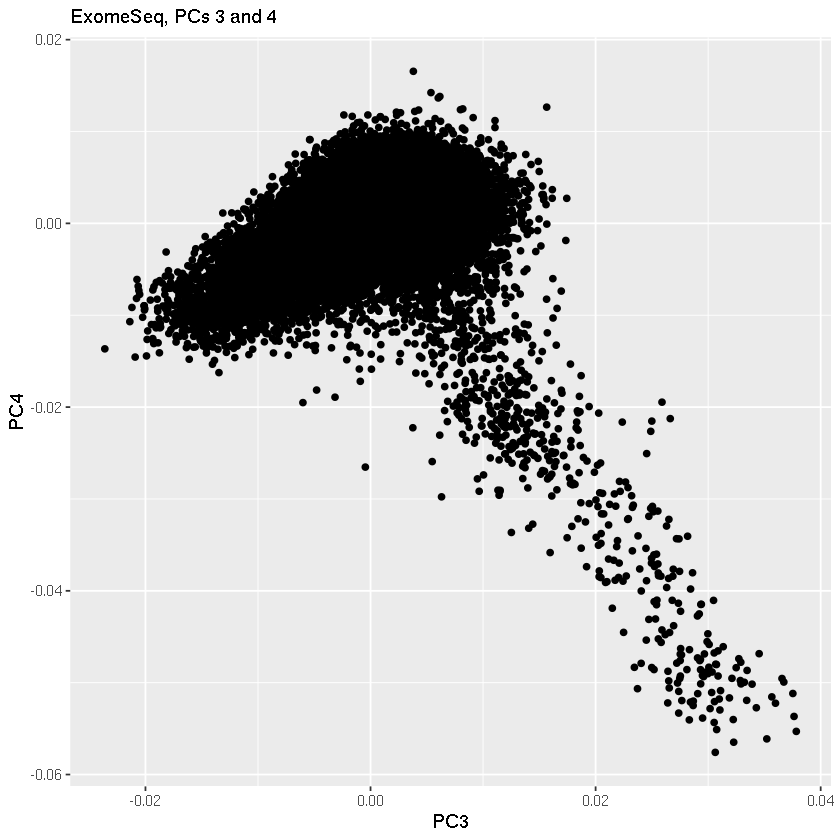

In [97]:
p = ggplot(d2) + geom_point(aes(x=PC3,y=PC4)) + ggtitle("ExomeSeq, PCs 3 and 4")
plot(p)

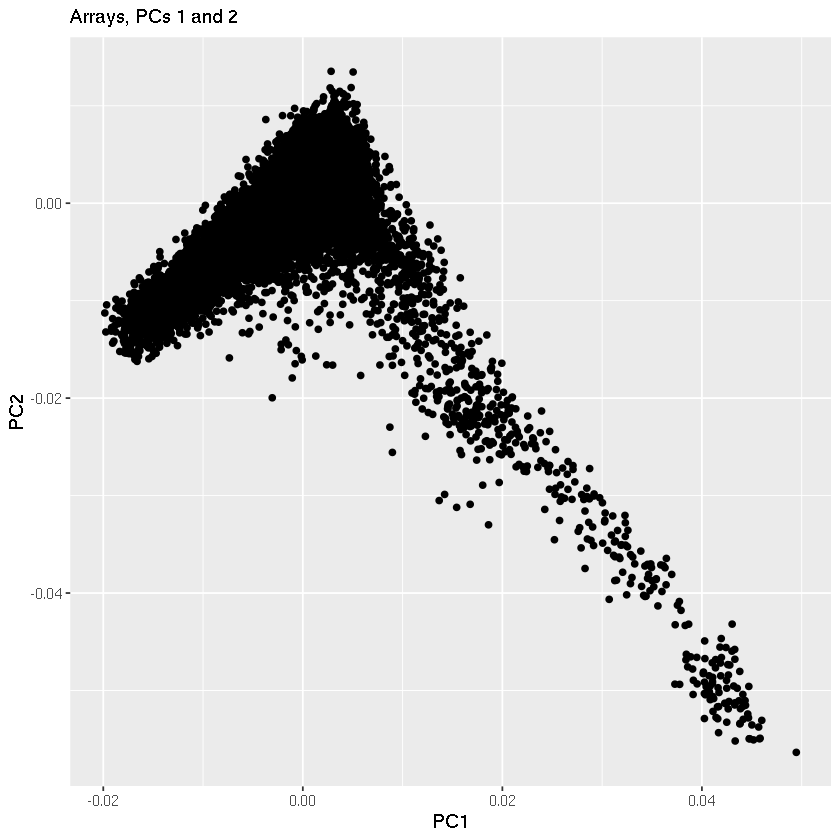

In [98]:
d3 = fread(
    "/oak/stanford/groups/euan/projects/elite/ukbb_exome/ukbb_analyze_pgen/eu_rivaslab_arrays/eu_pca.eigenvec",
    data.table=F,stringsAsFactors=F
)
p = ggplot(d3) + geom_point(aes(x=PC1,y=PC2))+ ggtitle("Arrays, PCs 1 and 2")
plot(p)

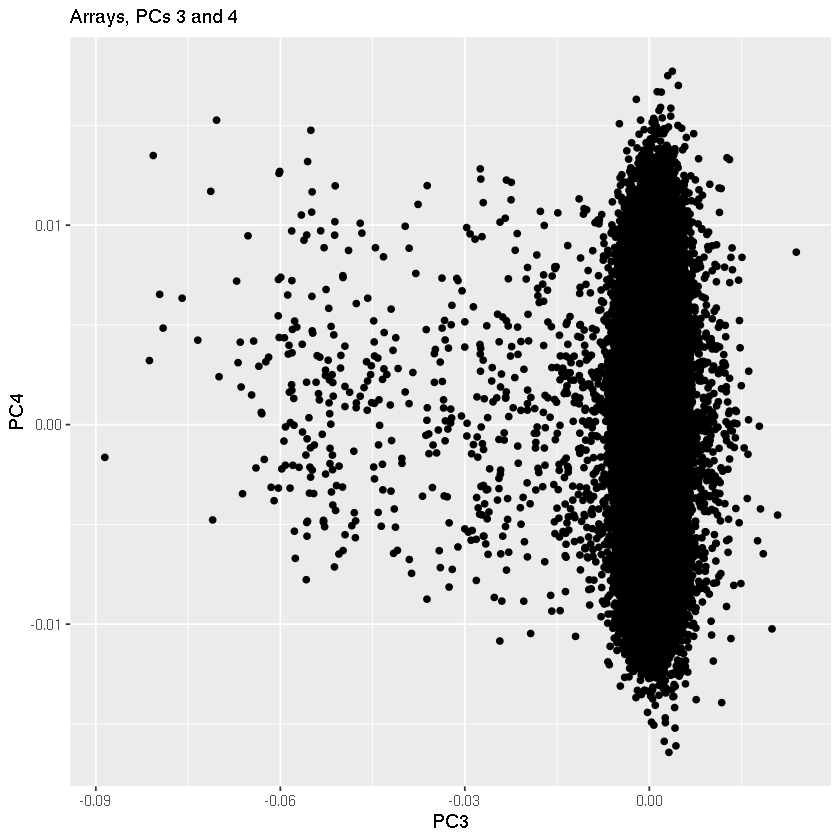

In [99]:
p = ggplot(d3) + geom_point(aes(x=PC3,y=PC4))+ ggtitle("Arrays, PCs 3 and 4")
plot(p)

In [100]:
rownames(d2) = as.character(d2[,2])
rownames(d3) = as.character(d3[,2])
d3 = d3[rownames(d2),]
d2 = d2[,-c(1:2)]
d3 = d3[,-c(1:2)]
d1 = d
rownames(d1) = as.character(d1[,2])
d1 = d1[rownames(d2),-c(1:2)]
colnames(d2) = paste("Seq",colnames(d2))
colnames(d3) = paste("Arrays",colnames(d3))
colnames(d1) = paste("Seq+Elite",colnames(d1))

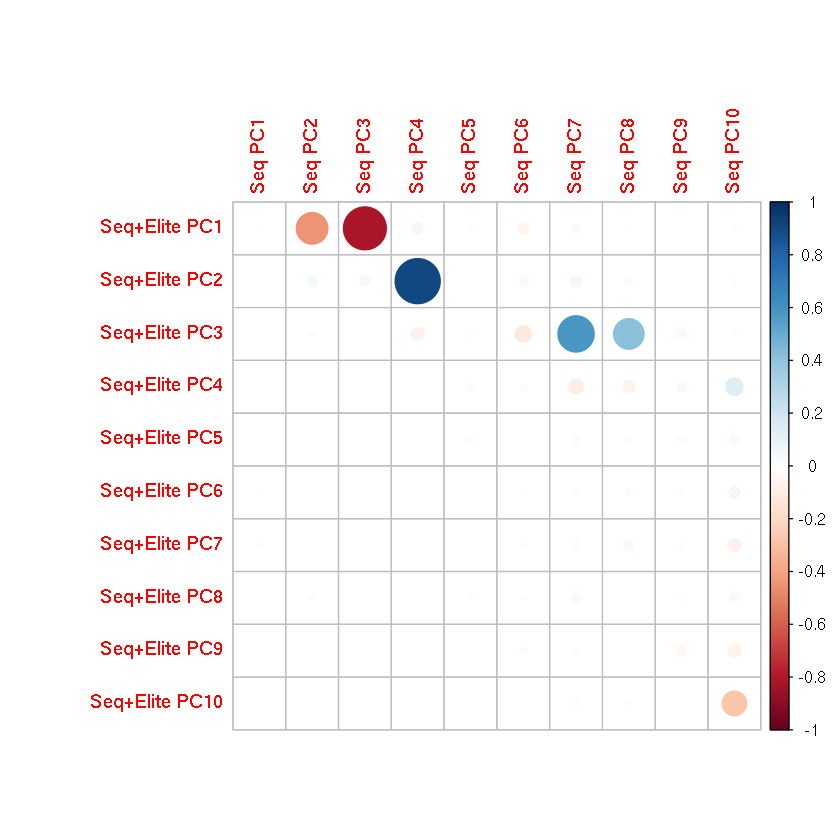

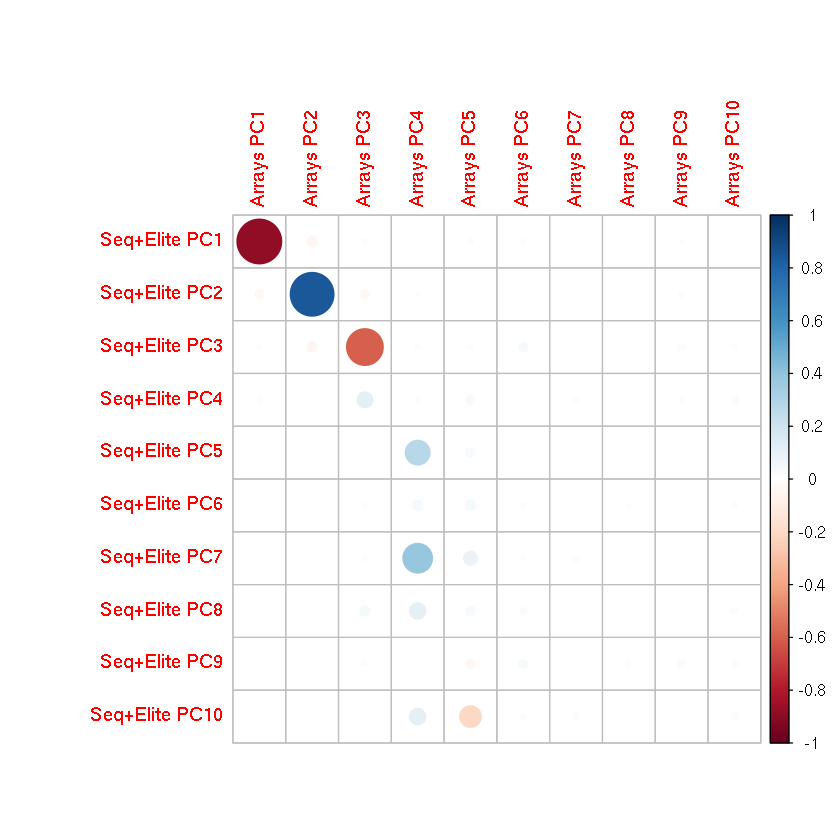

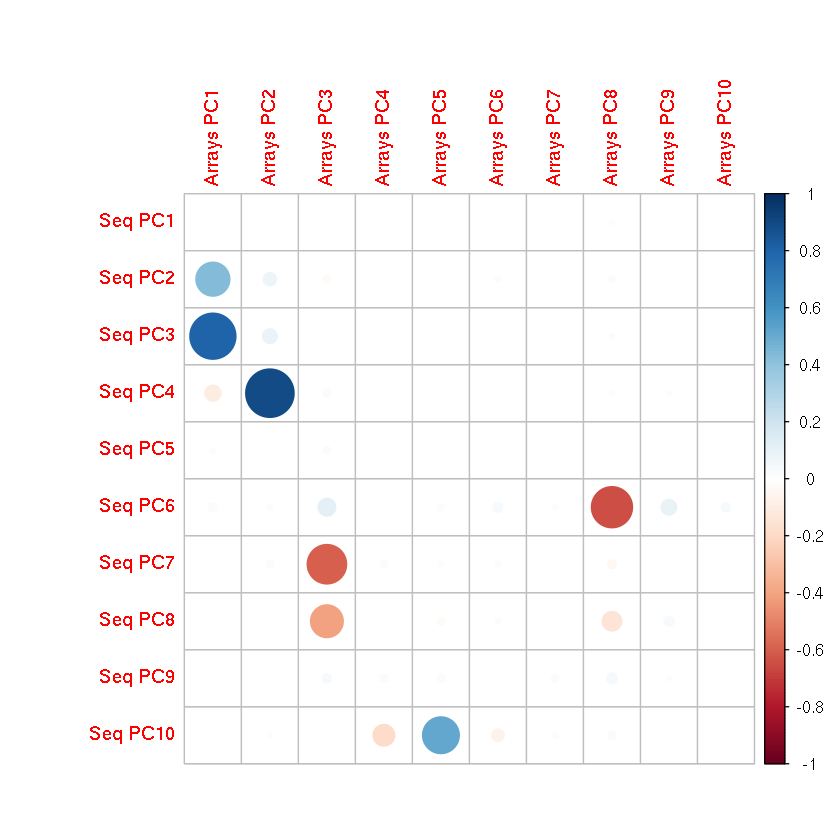

In [101]:
corrs1_2 = cor(d1[,1:10],d2)
corrs1_3 = cor(d1[,1:10],d3)
corrs2_3 = cor(d2,d3)
corrplot(corrs1_2)
corrplot(corrs1_3)
corrplot(corrs2_3)



# Array data: merged MEGA data




In [19]:
array_pca = fread("/oak/stanford/groups/euan/projects/fitness_genetics/analysis/mega_all_batches/merged_mega_data.eigenvec",
                 stringsAsFactors=F,data.table=F)
rownames(array_pca) = array_pca$IID
pheno_data = fread("/oak/stanford/groups/euan/projects/fitness_genetics/pheno/master_phe_mega.phe",
                  stringsAsFactors=F,data.table=F)
table(table(pheno_data[[1]]))
#rownames(pheno_data) = pheno_data$IID
elite_samples = pheno_data[[1]][pheno_data$Cohort == "ELITE"]
cooper_samples = pheno_data[[1]][pheno_data$Cohort == "Cooper"]
array_pca$cohort = "other"
array_pca$cohort[array_pca$IID %in% elite_samples] = "elite"
array_pca$cohort[array_pca$IID %in% cooper_samples] = "cooper"



   1 
4378 

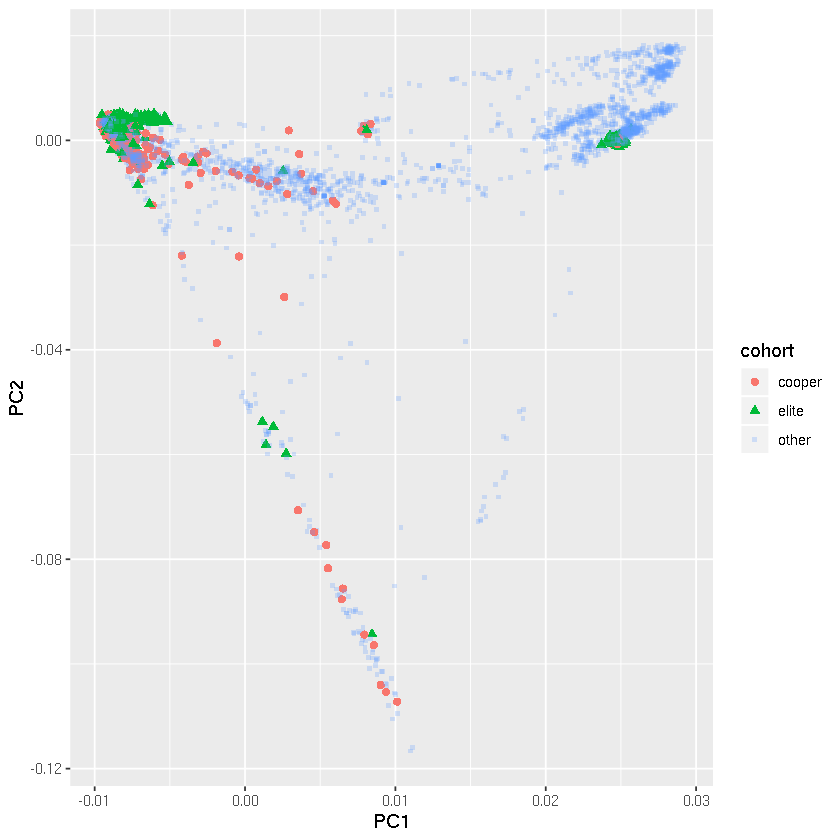

In [20]:
p = ggplot(array_pca) + 
geom_point(aes(x=PC1, y=PC2,col=cohort, shape=cohort,alpha=cohort,size=cohort))+
scale_size_manual(values=c(2.0,2.0,1)) +
scale_alpha_manual(values=c(1,1,0.25))
plot(p)

       
        cooper elite other
  FALSE     51    97  1747
  TRUE    1459   618  1560

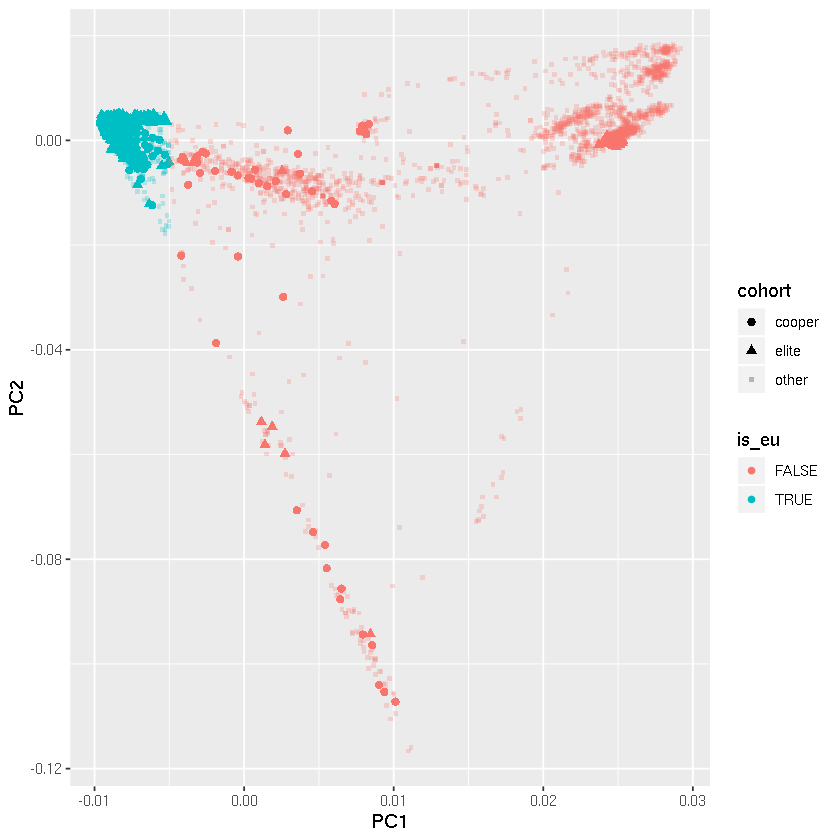

In [22]:
array_pca$is_eu = array_pca$PC1 < -0.005 & array_pca$PC2 > -0.02
p = ggplot(array_pca) + 
geom_point(aes(x=PC1, y=PC2,col=is_eu, shape=cohort,alpha=cohort,size=cohort))+
scale_size_manual(values=c(2.0,2.0,1)) +
scale_alpha_manual(values=c(1,1,0.25))
plot(p)
table(array_pca$is_eu,array_pca$cohort)
write.table(array_pca,file="/oak/stanford/groups/euan/projects/fitness_genetics/pheno/mega_all_pca.phe",
           row.names=F,col.names=T,sep="\t",quote=F)
eu_iids = array_pca$IID[array_pca$is_eu]
write.table(t(t(eu_iids)),file="/oak/stanford/groups/euan/projects/fitness_genetics/pheno/eu_ids.phe",
            row.names=F,col.names=F,sep="\t",quote=F)

In [23]:
# Move to analyzing the phenotypic data AFTER running EU PCA and removing outliers
pheno = fread("/oak/stanford/groups/euan/projects/fitness_genetics/pheno/master_phe_mega.phe",
             data.table=F,stringsAsFactors=F)
rownames(pheno) = pheno[[1]]
pheno = pheno[!is.na(pheno$PC1),]
pheno[is.na(pheno$Cohort),"Cohort"] = "other"
table(pheno$Cohort)
# Add country info for elite samples
elite_samp_country = sapply(pheno$Sample_ID,function(x)strsplit(x,split="_")[[1]][1])
elite_samp_country[elite_samp_country=="01"] = "USA"
elite_samp_country[elite_samp_country=="02"] = "United Kingdom"
elite_samp_country[elite_samp_country=="03"] = "Sweden"
elite_samp_country[elite_samp_country=="04"] = "USA"
elite_samp_country[elite_samp_country=="05"] = "Spain"
elite_samp_country[elite_samp_country=="07"] = "Lithuania"
elite_samp_country[elite_samp_country=="09"] = "USA"
elite_samp_country[pheno$Cohort!="ELITE"] = "Not ELITE"
print(table(elite_samp_country))
pheno$elite_samp_country = elite_samp_country


  Cooper    ELITE genepool    other 
    1510      715     1974       95 

elite_samp_country
            06             10      Lithuania      Not ELITE          Spain 
            85              5             74           3579             37 
        Sweden United Kingdom            USA 
           105             32            377 


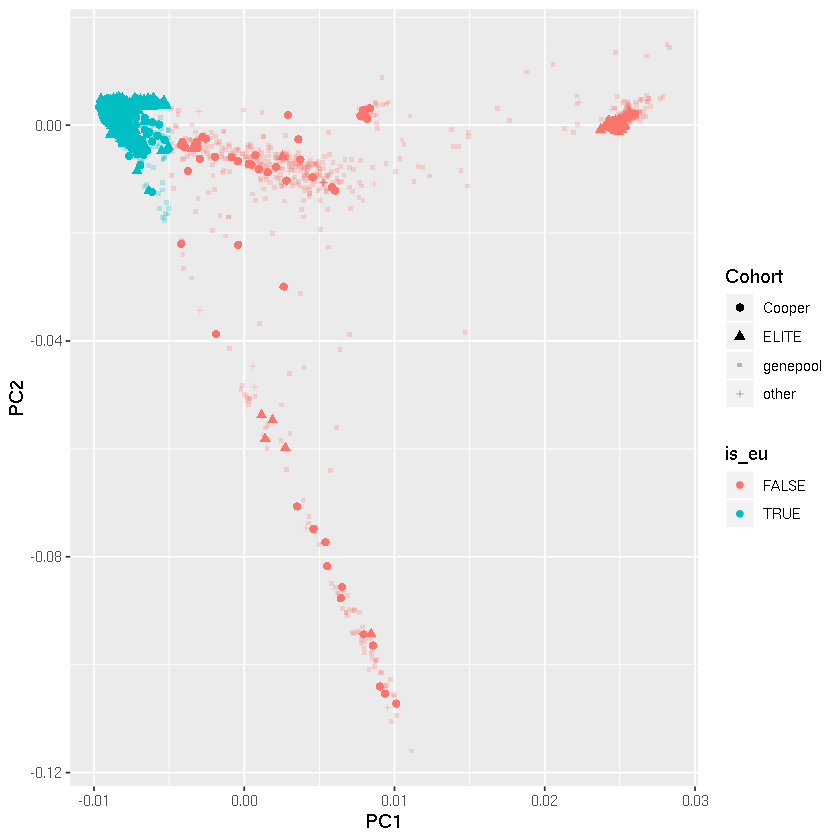

In [24]:
p = ggplot(pheno) + 
geom_point(aes(x=PC1, y=PC2,col=is_eu, shape=Cohort,alpha=Cohort,size=Cohort))+
scale_size_manual(values=c(2.0,2.0,1,1)) +
scale_alpha_manual(values=c(1,1,0.25,0.25))
plot(p)

Warning message:
“Removed 833 rows containing missing values (geom_point).”Warning message:
“Removed 833 rows containing missing values (geom_point).”

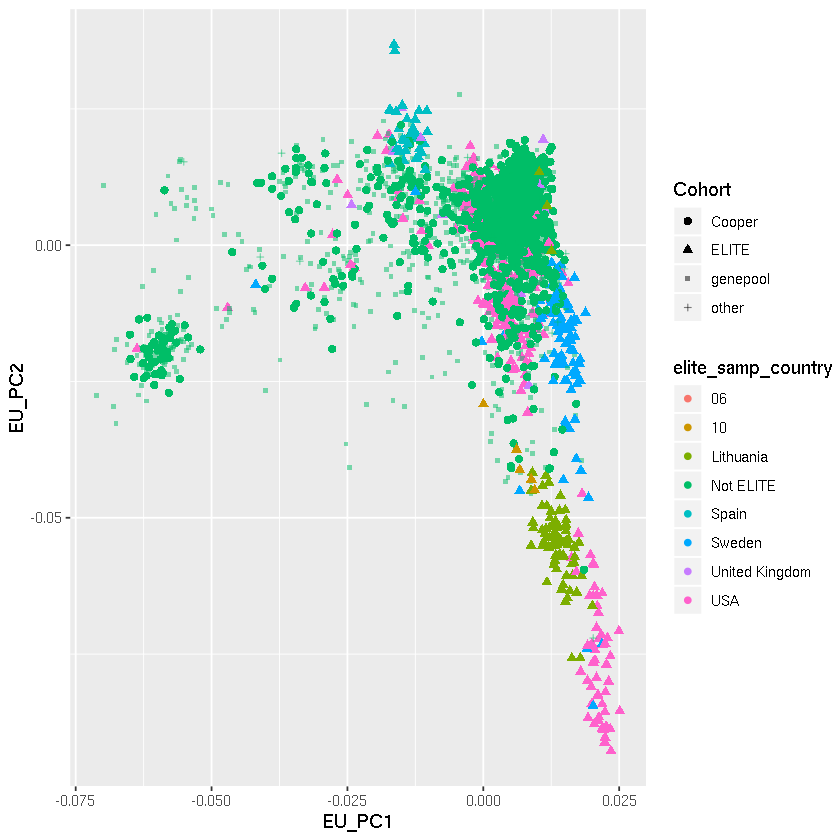

Warning message:
“Removed 833 rows containing missing values (geom_point).”

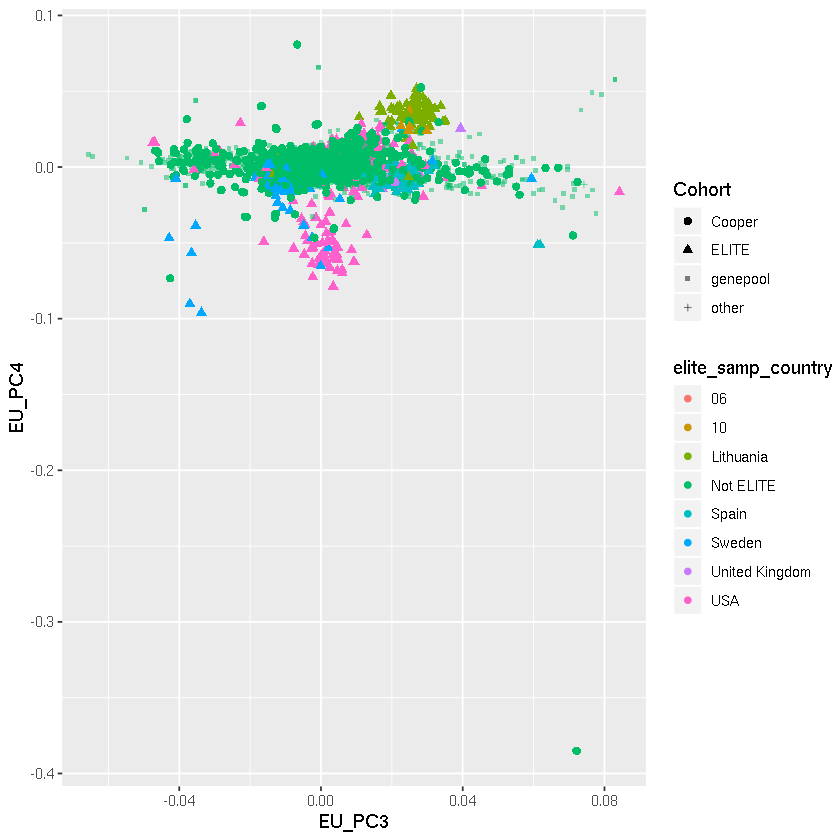

Warning message:
“Removed 833 rows containing missing values (geom_point).”

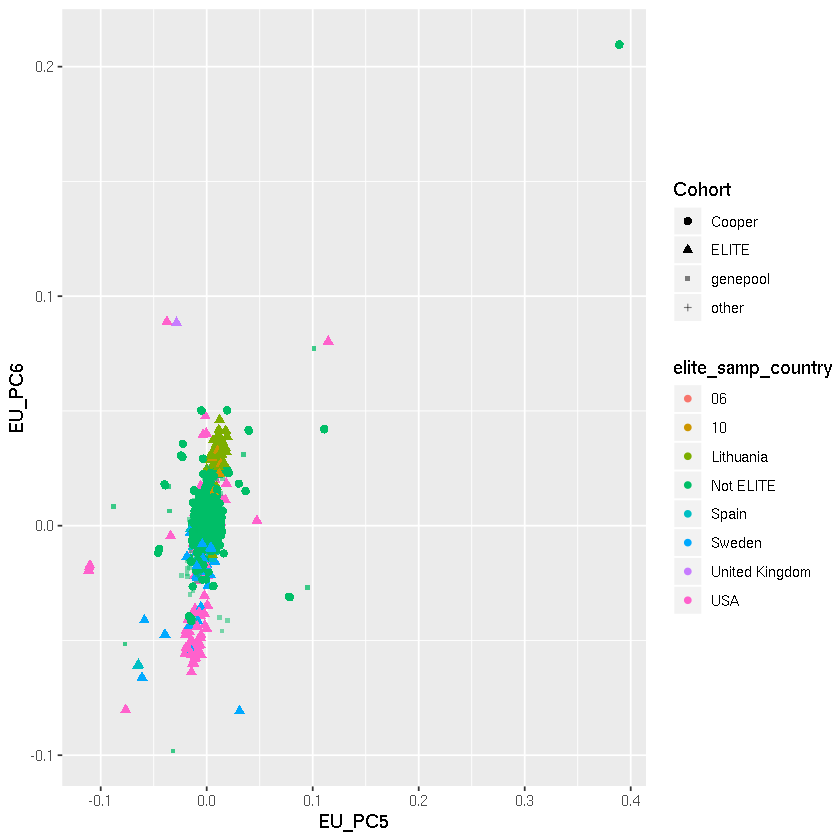

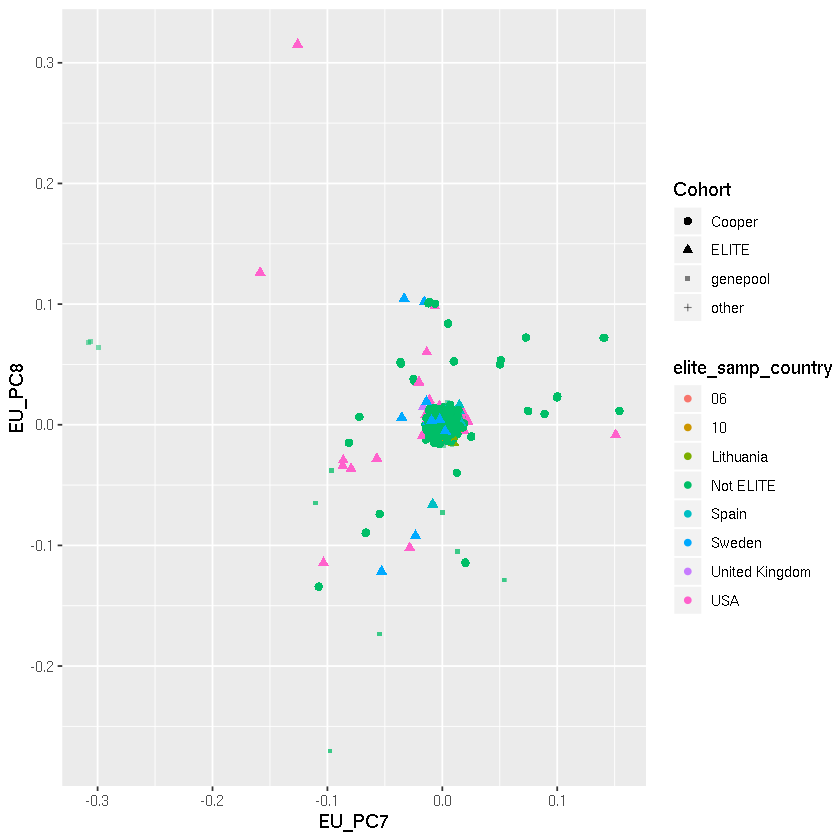

In [25]:
p = ggplot(pheno) + 
geom_point(aes(x=EU_PC1, y=EU_PC2,col=elite_samp_country, shape=Cohort,alpha=Cohort,size=Cohort))+
scale_size_manual(values=c(2.0,2.0,1,1)) +
scale_alpha_manual(values=c(1,1,0.5,0.5))
plot(p)
p = ggplot(pheno) + 
geom_point(aes(x=EU_PC3, y=EU_PC4,col=elite_samp_country, shape=Cohort,alpha=Cohort,size=Cohort))+
scale_size_manual(values=c(2.0,2.0,1,1)) +
scale_alpha_manual(values=c(1,1,0.5,0.5))
plot(p)
p = ggplot(pheno) + 
geom_point(aes(x=EU_PC5, y=EU_PC6,col=elite_samp_country, shape=Cohort,alpha=Cohort,size=Cohort))+
scale_size_manual(values=c(2.0,2.0,1,1)) +
scale_alpha_manual(values=c(1,1,0.5,0.5))
plot(p)
p = ggplot(pheno) + 
geom_point(aes(x=EU_PC7, y=EU_PC8,col=elite_samp_country, shape=Cohort,alpha=Cohort,size=Cohort))+
scale_size_manual(values=c(2.0,2.0,1,1)) +
scale_alpha_manual(values=c(1,1,0.5,0.5))
plot(p)

In [26]:
# Define the three EU clusters and compare to the Exome seq clustering
eu_cluster1 = pheno$EU_PC1 > -0.01 & pheno$EU_PC2 > -0.02
eu_cluster2 = pheno$EU_PC1 > 0.0 & pheno$EU_PC2 < -0.02
eu_cluster3 = pheno$EU_PC1 < -0.05 & pheno$EU_PC2 < 0
eu_cluster4 = !eu_cluster1 & !eu_cluster2 & !eu_cluster3
eu_clusters = data.frame(IID = pheno[[1]],Sample_ID = pheno$Sample_ID,
                         eu_cluster1=as.numeric(eu_cluster1),
                         eu_cluster2=as.numeric(eu_cluster2),
                         eu_cluster3=as.numeric(eu_cluster3),
                         eu_cluster4=as.numeric(eu_cluster4))
eu_clusters$eu_clusters = NA
eu_clusters$eu_clusters[eu_cluster1] = "eu_cluster1"
eu_clusters$eu_clusters[eu_cluster2] = "eu_cluster2"
eu_clusters$eu_clusters[eu_cluster3] = "eu_cluster3"
eu_clusters$eu_clusters[eu_cluster4] = "eu_cluster4"


exome_seq_cluster1 = read.table(
"/oak/stanford/groups/euan/projects/elite/ukbb_exome/ukbb_elite_merged_rivaslabEU_intra.fam",
stringsAsFactors=F
)
exome_seq_cluster2 = read.table(
"/oak/stanford/groups/euan/projects/elite/ukbb_exome/ukbb_elite_merged_rivaslabEU_intra_others.fam",
stringsAsFactors=F
)
exome_seq_cluster1 = exome_seq_cluster1[grepl("_",exome_seq_cluster1[,2]),2]
exome_seq_cluster2 = exome_seq_cluster2[grepl("_",exome_seq_cluster2[,2]),2]

eu_clusters$exome_seq_clusters = NA
eu_clusters$exome_seq_clusters[eu_clusters[[2]]%in%exome_seq_cluster1] = "exome_seq_cluster1"
eu_clusters$exome_seq_clusters[eu_clusters[[2]]%in%exome_seq_cluster2] = "exome_seq_cluster2"

length(exome_seq_cluster1)
length(exome_seq_cluster2)
table(eu_clusters$exome_seq_clusters,eu_clusters$eu_clusters)

table(eu_clusters$eu_clusters)

pheno = cbind(pheno,eu_clusters[,-c(1:2)])
table(pheno$eu_clusters,pheno$Cohort)

[1] 127

[1] 131

                    
                     eu_cluster1 eu_cluster2 eu_cluster3 eu_cluster4
  exome_seq_cluster1          91           8           0           0
  exome_seq_cluster2          36          59           0          22


eu_cluster1 eu_cluster2 eu_cluster3 eu_cluster4 
       2683         236         143         399 

             
              Cooper ELITE genepool other
  eu_cluster1   1259   369     1004    51
  eu_cluster2     26   175       34     1
  eu_cluster3     47     1       95     0
  eu_cluster4    116    60      218     5


exome_seq_cluster1 exome_seq_cluster2 
               103                119 

                    
                     FALSE TRUE
  exome_seq_cluster1     1  102
  exome_seq_cluster2     1  118

Warning message:
“Removed 833 rows containing missing values (geom_point).”

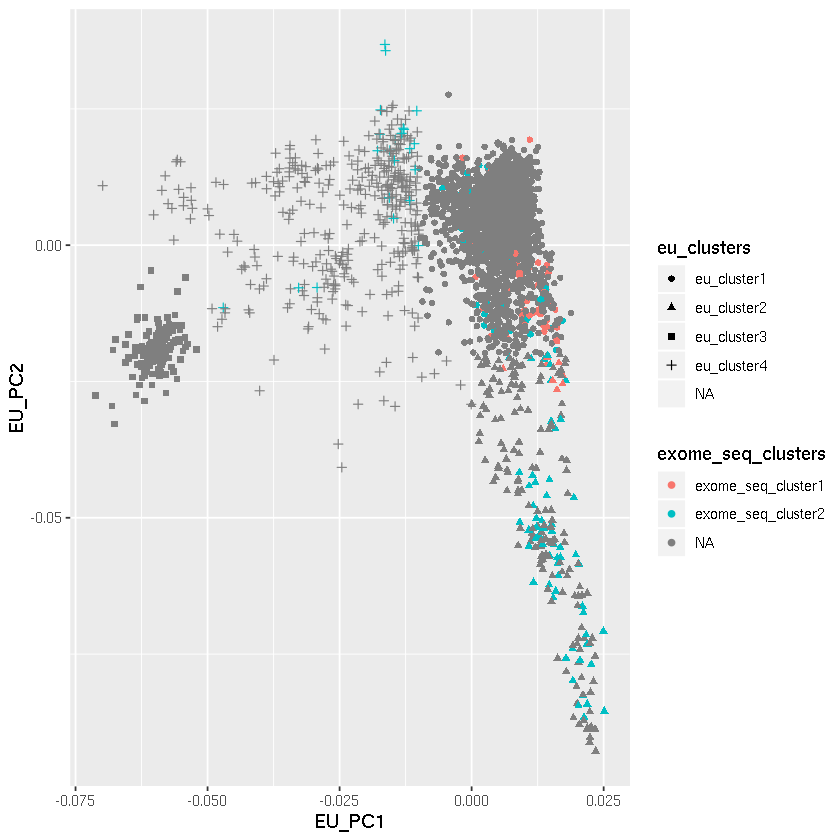

In [27]:
table(eu_clusters$exome_seq_clusters)
table(eu_clusters$exome_seq_clusters,pheno$is_eu)
p = ggplot(pheno) + 
geom_point(aes(x=EU_PC1, y=EU_PC2,col=exome_seq_clusters, shape=eu_clusters))
plot(p)

In [29]:
# Print the EU clusters to phe files
for(cl in unique(pheno$eu_clusters)){
    samps = pheno[[1]][pheno$eu_clusters == cl]
    samps = samps[!is.na(samps)]
    print(paste(cl,length(samps)))
    samps = c("#IID",samps)
    write.table(t(t(samps)),
            file=paste0("/oak/stanford/groups/euan/projects/fitness_genetics/pheno/",cl,".phe"),
            row.names=F,col.names=F,sep="\t",quote=F)
}

[1] "eu_cluster1 2683"
[1] "eu_cluster4 399"
[1] "eu_cluster3 143"
[1] "NA 0"
[1] "eu_cluster2 236"


In [30]:
# extract some stats
table(pheno$Cohort,is.na(pheno$PC1))

          
           FALSE
  Cooper    1510
  ELITE      715
  genepool  1974
  other       95